# Basic Collections Data Analysis Project

Author: Sebastian Quesada

## Objective

Analyze customer financial data to understand debt patterns and support collections

This dataset contains simulated customer information like:

- Age
- Income
- Debt

The goal is to analyze customer debt behavior and identify useful patterns.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
np.random.seed(1)

age = np.random.randint(20,60,300)

income = np.random.randint(1000,4000,300)

debt = income * 0.6 + np.random.randint(-400,400,300)

data = pd.DataFrame({

"Age": age,

"Income USD": income,

"Debt USD": debt

})

In [58]:
data.shape

(300, 3)

In [59]:
data.head()

,Age,Income USD,Debt USD
0,57,1410,823.0
1,32,1542,961.2
2,28,3919,2531.4
3,29,2088,1025.8
4,31,2174,1096.4


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         300 non-null    int32  
 1   Income USD  300 non-null    int32  
 2   Debt USD    300 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 4.8 KB


In [61]:
data.describe()

,Age,Income USD,Debt USD
count,300.000000,300.000000,300.000000
mean,38.810000,2491.820000,1469.418667
std,10.959666,887.096844,581.166966
min,20.000000,1014.000000,363.400000
25%,30.000000,1756.000000,978.700000
50%,39.000000,2470.500000,1440.800000
75%,47.250000,3271.250000,1938.850000
max,59.000000,3994.000000,2728.200000


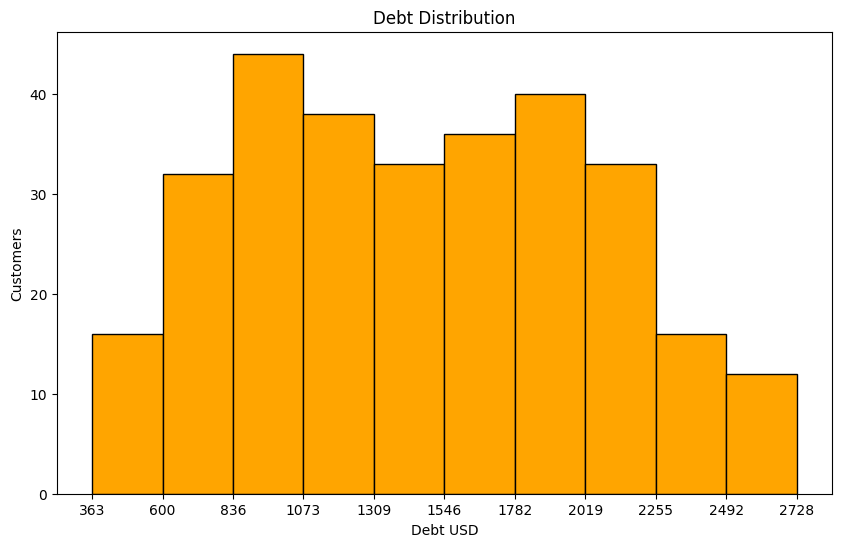

In [84]:
plt.figure(figsize=(10,6))

counts, bins, bars = plt.hist(
data["Debt USD"],
bins=10,
color="orange",
edgecolor="black"
)

plt.xticks(bins)

plt.title("Debt Distribution")

plt.xlabel("Debt USD")

plt.ylabel("Customers")

plt.show()

The histogram shows that most customers fall into a moderate debt range around 1073 USD, with fewer customers at both the lower and higher ends. This indicates a clear central tendency toward mid-level debt, suggesting that small debts are uncommon and very high debts are relatively rare, while the majority of customers carry manageable, mid-range obligations.

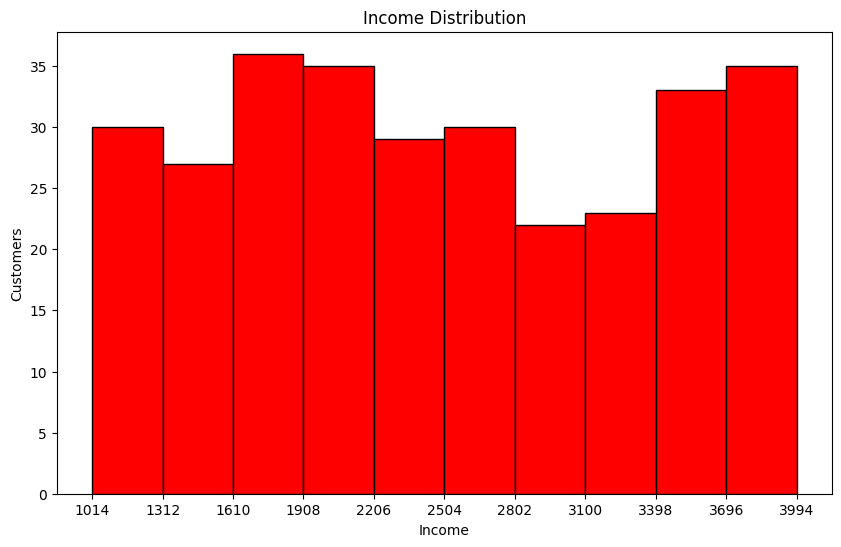

In [89]:
plt.figure(figsize=(10,6))

counts, bins, bars = plt.hist(
data["Income USD"],
bins=10,
color="red",
edgecolor="black"
)

plt.xticks(bins)

plt.title("Income Distribution")

plt.xlabel("Income")

plt.ylabel("Customers")

plt.show()

The income distribution shows two critical segments for collections: a high-volume "at-risk" cluster ($1.6k–$2.2k) that requires automated, frequent reminders due to tighter budgets, and a high-income peak ($3.7k+) where debt is likely an oversight, best resolved through professional outreach.

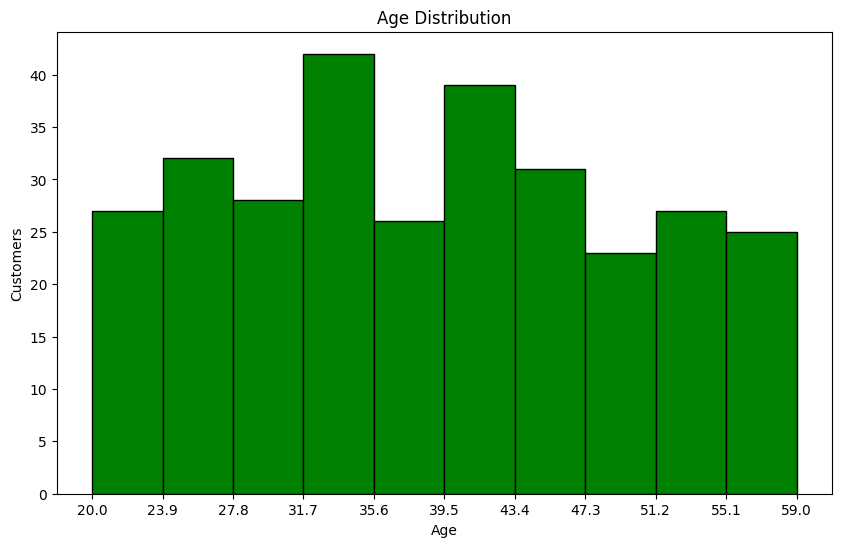

In [92]:
plt.figure(figsize=(10,6))

counts, bins, bars = plt.hist(
data["Age"],
bins=10,
color="green",
edgecolor="black"
)

plt.xticks(bins)

plt.title("Age Distribution")

plt.xlabel("Age")

plt.ylabel("Customers")

plt.show()

The age distribution data reveals a significant peak in the 32 to 47 age bracket, identifying this as the highest-volume customer segment and the primary area of financial exposure. This economically active group likely manages multiple financial commitments, representing both the largest delinquency risk and the most critical recovery opportunity within the portfolio.

Proposed Strategy for Improvement 

Segmented Communication: Deploy digital-first automation (SMS and app notifications) for the 32–47 peak to match the high-speed lifestyle of this demographic while maintaining high-frequency touchpoints without increasing manual overhead. 

High-Touch Engagement: Transition to a personalized, consultative approach via direct phone calls for the 50+ segment. Given the lower volume in this bracket, a more tailored interaction can effectively resolve debts that may stem from administrative oversight rather than lack of funds.

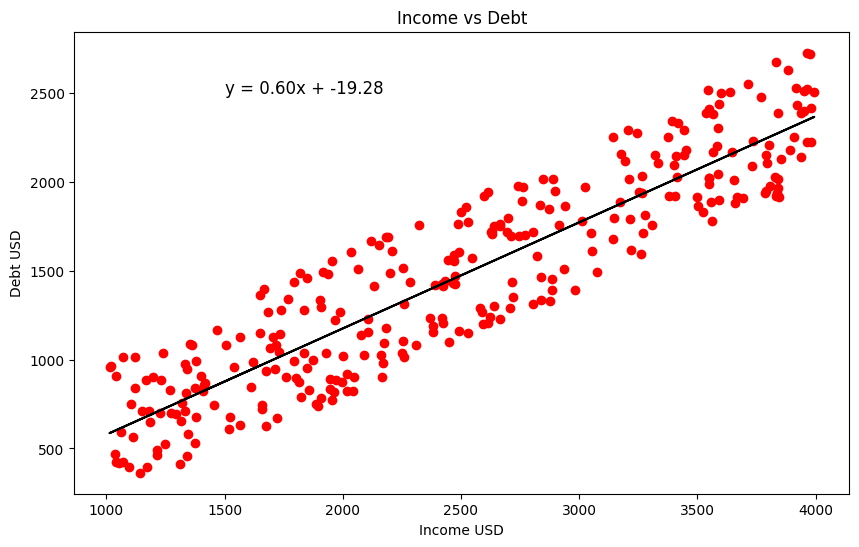

In [96]:
plt.figure(figsize=(10,6))

plt.scatter(
data["Income USD"],
data["Debt USD"],
color="red"
)

m,b = np.polyfit(data["Income USD"],data["Debt USD"],1)

plt.plot(
data["Income USD"],
m*data["Income USD"]+b,
color="black"
)

equation = f"y = {m:.2f}x + {b:.2f}"

plt.text(
1500,
2500,
equation,
fontsize=12
)

plt.title("Income vs Debt")

plt.xlabel("Income USD")

plt.ylabel("Debt USD")

plt.show()

In [72]:
data.corr()

,Age,Income USD,Debt USD,debt_ratio
Age,1.000000,-0.045572,-0.028083,-0.001374
Income USD,-0.045572,1.000000,0.911926,0.010175
Debt USD,-0.028083,0.911926,1.000000,0.390253
debt_ratio,-0.001374,0.010175,0.390253,1.000000


The analysis reveals a high correlation coefficient of 0.91 between income and debt, confirming that debt levels scale predictably with earnings. The regression model y = 0.60x - 19.28 establishes that for every dollar of income, customers typically carry 0.60 in debt. 

In [70]:
data["debt_ratio"] = data["Debt USD"] / data["Income USD"]

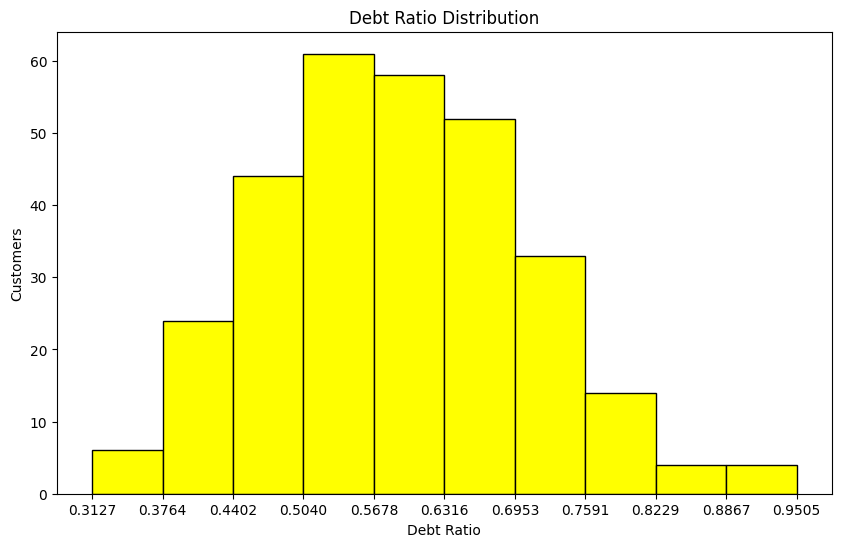

In [94]:
plt.figure(figsize=(10,6))

counts, bins, bars = plt.hist(
data["debt_ratio"],
bins=10,
color="yellow",
edgecolor="black"
)

plt.xticks(bins)

plt.title("Debt Ratio Distribution")

plt.xlabel("Debt Ratio")

plt.ylabel("Customers")

plt.show()

Based on the distribution, your collection portfolio is at high risk, with the majority of customers clustered in the 0.50 to 0.69 debt ratio range, indicating they are severely over-leveraged and have minimal disposable income.